## Assignment. 자동차 평가 데이터에 대한 EDA 및 Decision Tree를 활용한 예측

In [1]:
import urllib2
from scipy import stats
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
raw_csv = urllib2.urlopen(path)
feature_names = ('buying', 'maint', 'doors', 'persons', "log_boot", "safety")
target_name = 'eval'
all_names = feature_names + (target_name,)
df = pd.read_csv(raw_csv, names=all_names)

In [2]:
df

,buying,maint,doors,persons,log_boot,safety,eval
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [3]:
df.describe()

,buying,maint,doors,persons,log_boot,safety,eval
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,med,med,3,more,med,med,unacc
freq,432,432,432,576,576,576,1210


### [Mission 1] 모든 속성들을 수치형 데이터로 변환

In [4]:
df.isnull().values.any()    #missing Data가 없음을 확인 가능

False

In [5]:
q = df.describe()
q.irow(0)

buying      1728
maint       1728
doors       1728
persons     1728
log_boot    1728
safety      1728
eval        1728
Name: count, dtype: object

In [6]:
df.shape[1]

7

### 각 속성을 수치형으로 출력 (수치형 함수 선언)

In [7]:
def Numerical(df):
    num_columns = df.shape[1]
    map_dic = {}
    for i in range(num_columns):
        unique_array = df[all_names[i]].unique()   #각 컬럼의 유일한 값을 unique_array에 저장
        N = len(unique_array)
        map_dic[i] = {}
        for j in range(N):
            map_dic[i][unique_array[j]] = j
        df[all_names[i]] = df[all_names[i]].map(map_dic[i])    #사전으로 만든 내용으로 각 컬럼들을 수치화
        
Numerical(df)
df

,buying,maint,doors,persons,log_boot,safety,eval
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0
5,0,0,0,0,1,2,0
6,0,0,0,0,2,0,0
7,0,0,0,0,2,1,0
8,0,0,0,0,2,2,0
9,0,0,0,1,0,0,0


In [8]:
df.describe()

,buying,maint,doors,persons,log_boot,safety,eval
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,0.417245
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,0.747188
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000,0.000000
50%,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,0.000000
75%,2.250000,2.250000,2.250000,2.000000,2.000000,2.000000,1.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000


### [Mission 2] Target 4개별로 그룹핑하여 각 속성별 기본 통계치 및 Box Plot 산출

In [9]:
df_unacc = df[df['eval'] == 0]   # 각 구르부을 4개의 그룹으로 그룹핑
df_acc = df[df['eval'] == 1]     # unacc : 0, acc : 1, good : 3, vgood : 2
df_good = df[df['eval'] == 3]
df_vgood = df[df['eval'] == 2]

In [10]:
df_unacc.head()

,buying,maint,doors,persons,log_boot,safety,eval
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0


- unacc's Box Plot

/Users/hyunkyo/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/pandas/tools/plotting.py:2633: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  warnings.warn(msg, FutureWarning)


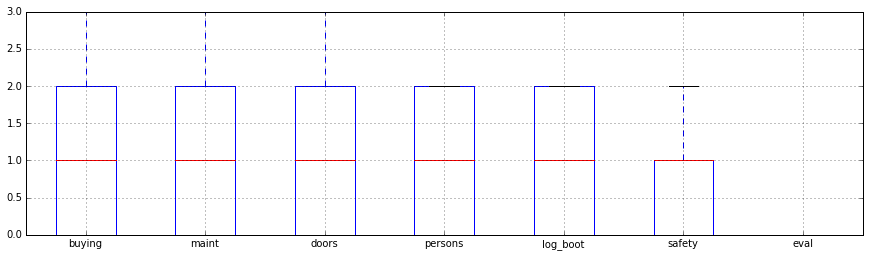

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
df_unacc.boxplot(ax=ax)
plt.show()

- acc's Box Plot

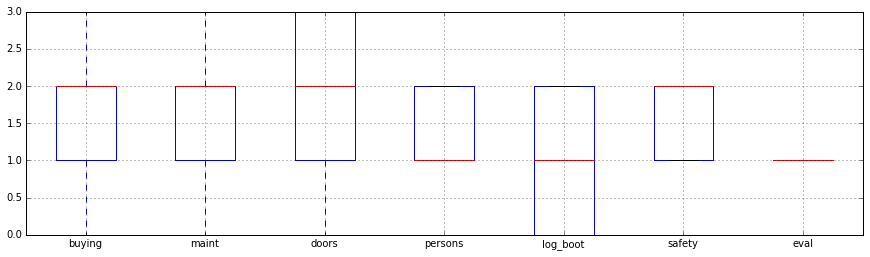

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
df_acc.boxplot(ax=ax)
plt.show()

- good's Box Plot

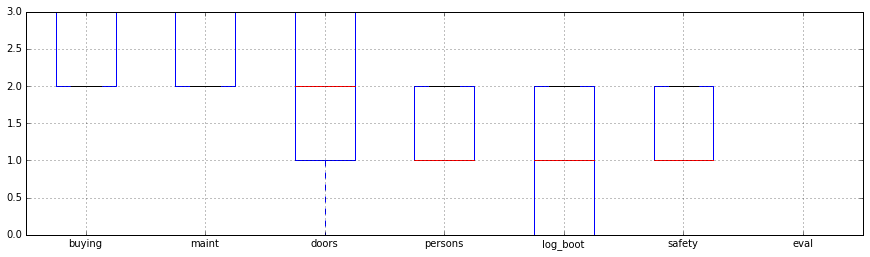

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
df_good.boxplot(ax=ax)
plt.show()

- vgood's Box Plot

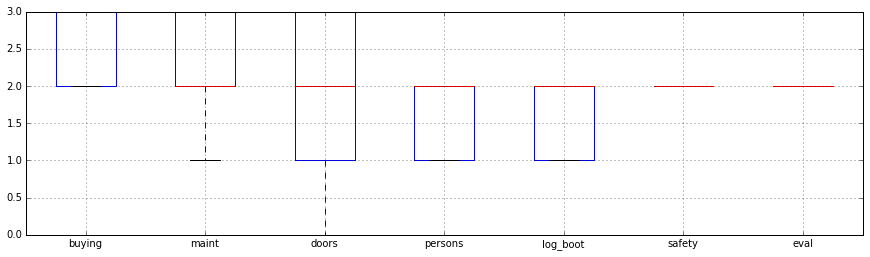

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
df_vgood.boxplot(ax=ax)
plt.show()

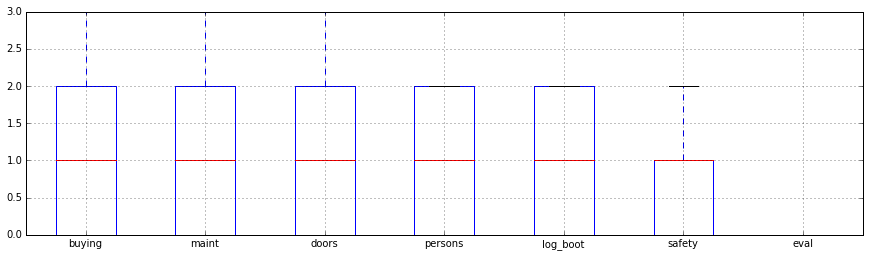

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
df_unacc.boxplot(ax=ax)
plt.show()

### 정규화 한 경우

In [16]:
num_columns = df.shape[1]
for i in range(0, num_columns-1):
    unique_array = df[all_names[i]].unique()
    N = len(unique_array)
    map_dic_sub = {}
    for j in range(N):
        if j == 0:
            map_dic_sub[j] = 0
        else:
            map_dic_sub[j] = j / float(N - 1)   #정규화를 위한 과정
    df[all_names[i]] = df[all_names[i]].map(map_dic_sub)
df

,buying,maint,doors,persons,log_boot,safety,eval
0,0,0,0.000000,0.0,0.0,0.0,0
1,0,0,0.000000,0.0,0.0,0.5,0
2,0,0,0.000000,0.0,0.0,1.0,0
3,0,0,0.000000,0.0,0.5,0.0,0
4,0,0,0.000000,0.0,0.5,0.5,0
5,0,0,0.000000,0.0,0.5,1.0,0
6,0,0,0.000000,0.0,1.0,0.0,0
7,0,0,0.000000,0.0,1.0,0.5,0
8,0,0,0.000000,0.0,1.0,1.0,0
9,0,0,0.000000,0.5,0.0,0.0,0


In [17]:
df_unacc = df[df['eval'] == 0]   # 각 구르부을 4개의 그룹으로 그룹핑
df_acc = df[df['eval'] == 1]     # unacc : 0, acc : 1, good : 3, vgood : 2
df_good = df[df['eval'] == 3]
df_vgood = df[df['eval'] == 2]

- 정규화되어진 unacc's Box Plot

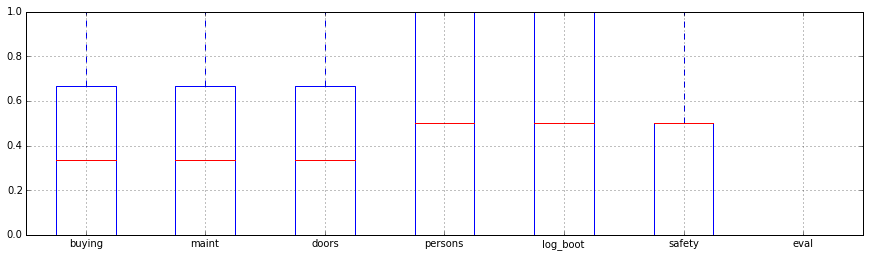

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
df_unacc.boxplot(ax=ax)
plt.show()

- 정규화되어진 acc's Box Plot

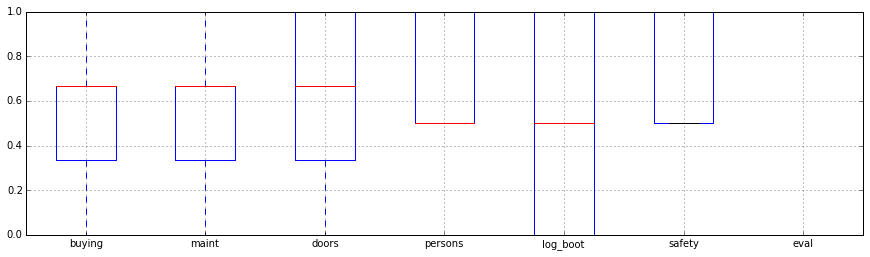

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
df_acc.boxplot(ax=ax)
plt.show()

- 정규화되어진 good's Box Plot

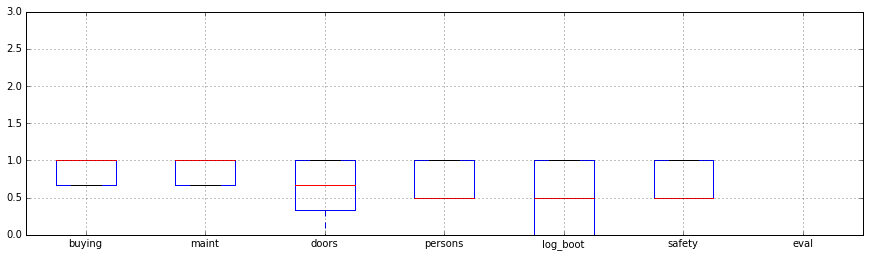

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
df_good.boxplot(ax=ax)
plt.show()

- 정규화되어진 vgood's Box Plot

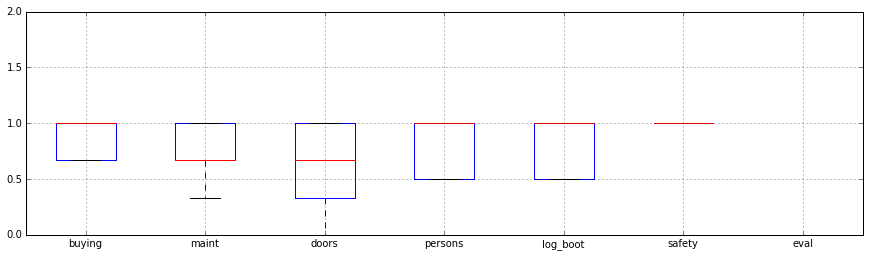

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
df_vgood.boxplot(ax=ax)
plt.show()

### [Mission 3] 각 속성들을 두 개씩 쌍을 지어서 각 쌍마다 Scatter Plot 그리기

In [22]:
path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
raw_csv = urllib2.urlopen(path)
feature_names = ('buying', 'maint', 'doors', 'persons', "log_boot", "safety")
target_name = 'eval'
all_names = feature_names + (target_name,)
df = pd.read_csv(raw_csv, names=all_names)

In [23]:
Numerical(df)

In [24]:
df_unacc = df[df['eval'] == 0]   # 각 구르부을 4개의 그룹으로 그룹핑
df_acc = df[df['eval'] == 1]     # unacc : 0, acc : 1, good : 3, vgood : 2
df_good = df[df['eval'] == 3]
df_vgood = df[df['eval'] == 2]

In [25]:
df2 = df.ix[:,0:6]   # target을 제외한 평가에 필요한 6가지의 기준을 새로운 df2에 저장

In [26]:
df2

,buying,maint,doors,persons,log_boot,safety
0,0,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,2
3,0,0,0,0,1,0
4,0,0,0,0,1,1
5,0,0,0,0,1,2
6,0,0,0,0,2,0
7,0,0,0,0,2,1
8,0,0,0,0,2,2
9,0,0,0,1,0,0


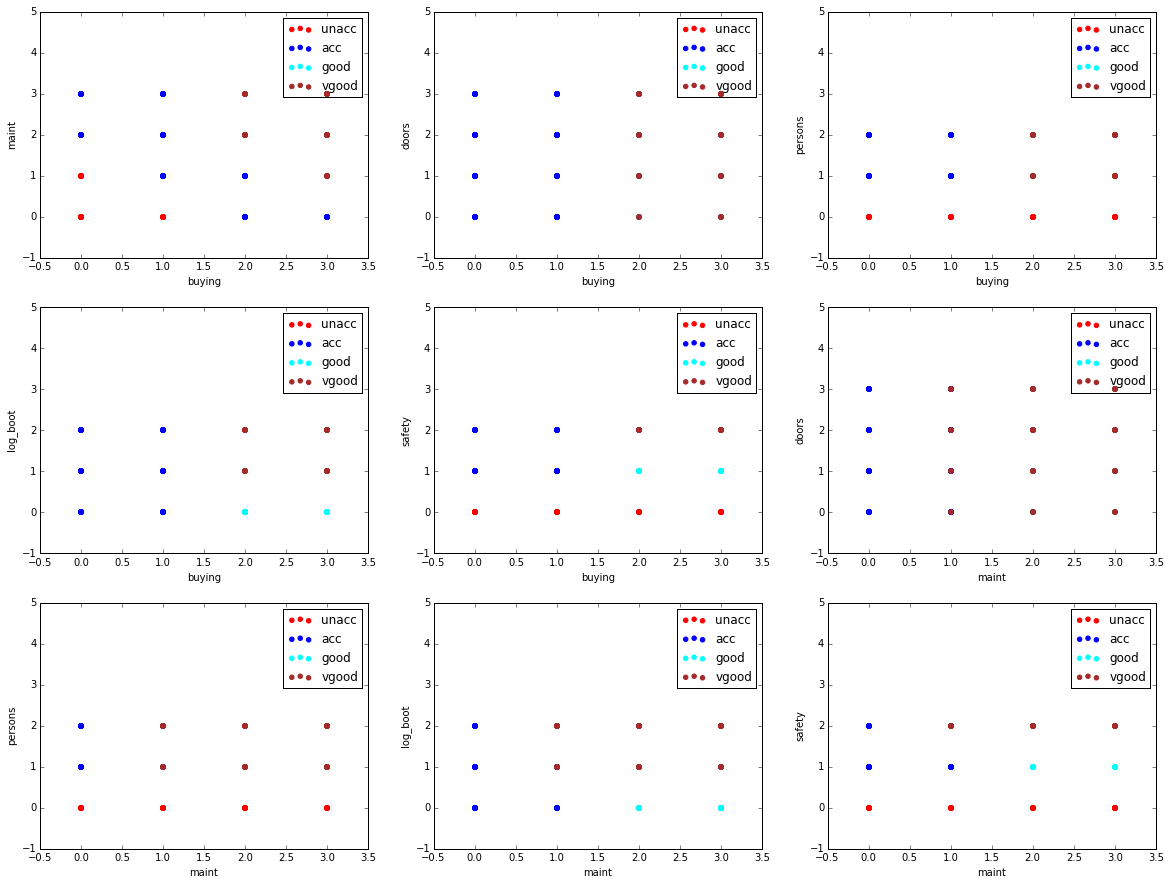

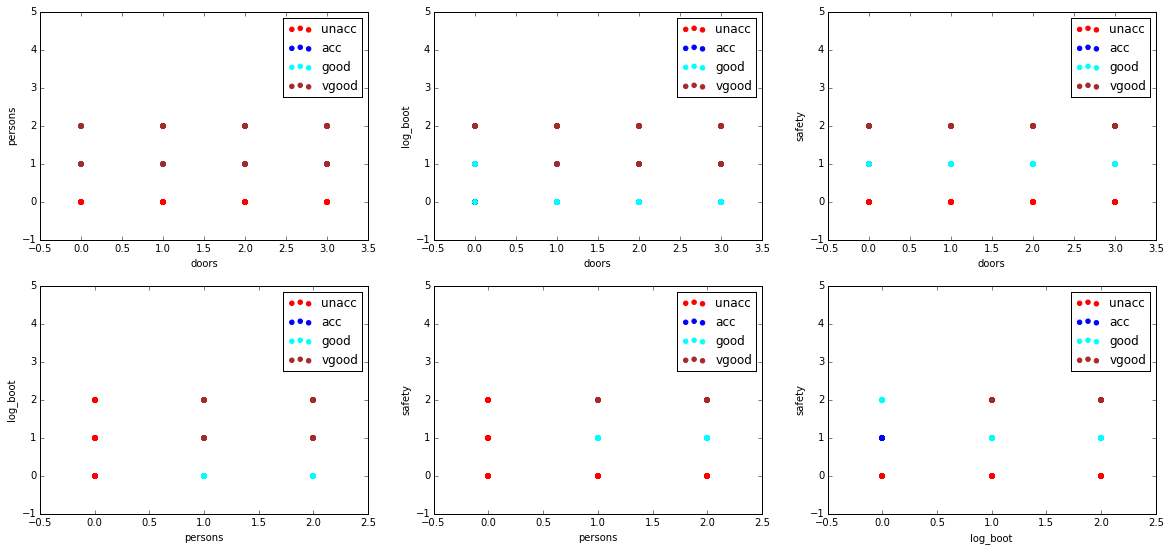

In [27]:
eval_names = ('unacc', 'acc', 'good', 'vgood')
options = {
    0: {
        'data_x': feature_names[0],
        'data_y': feature_names[1],
        'label_x': feature_names[0],
        'label_y': feature_names[1],
        'ylim_min': -1,
        'ylim_max': 5
    },
    1: {
        'data_x': feature_names[0],
        'data_y': feature_names[2],
        'label_x': feature_names[0],
        'label_y': feature_names[2],
        'ylim_min': -1,
        'ylim_max': 5
    },
    2: {
        'data_x': feature_names[0],
        'data_y': feature_names[3],
        'label_x': feature_names[0],
        'label_y': feature_names[3],
        'ylim_min': -1,
        'ylim_max': 5
    },
    3: {
        'data_x': feature_names[0],
        'data_y': feature_names[4],
        'label_x': feature_names[0],
        'label_y': feature_names[4],
        'ylim_min': -1,
        'ylim_max': 5
    },
    4: {
        'data_x': feature_names[0],
        'data_y': feature_names[5],
        'label_x': feature_names[0],
        'label_y': feature_names[5],
        'ylim_min': -1,
        'ylim_max': 5
    },    
    5: {
        'data_x': feature_names[1],
        'data_y': feature_names[2],
        'label_x': feature_names[1],
        'label_y': feature_names[2],
        'ylim_min': -1,
        'ylim_max': 5
    },
    6: {
        'data_x': feature_names[1],
        'data_y': feature_names[3],
        'label_x': feature_names[1],
        'label_y': feature_names[3],
        'ylim_min': -1,
        'ylim_max': 5
    },
    7: {
        'data_x': feature_names[1],
        'data_y': feature_names[4],
        'label_x': feature_names[1],
        'label_y': feature_names[4],
        'ylim_min': -1,
        'ylim_max': 5
    },
    8: {
        'data_x': feature_names[1],
        'data_y': feature_names[5],
        'label_x': feature_names[1],
        'label_y': feature_names[5],
        'ylim_min': -1,
        'ylim_max': 5
    },
    9: {
        'data_x': feature_names[2],
        'data_y': feature_names[3],
        'label_x': feature_names[2],
        'label_y': feature_names[3],
        'ylim_min': -1,
        'ylim_max': 5
    },
    10: {
        'data_x': feature_names[2],
        'data_y': feature_names[4],
        'label_x': feature_names[2],
        'label_y': feature_names[4],
        'ylim_min': -1,
        'ylim_max': 5
    },
    11: {
        'data_x': feature_names[2],
        'data_y': feature_names[5],
        'label_x': feature_names[2],
        'label_y': feature_names[5],
        'ylim_min': -1,
        'ylim_max': 5
    },
    12: {
        'data_x': feature_names[3],
        'data_y': feature_names[4],
        'label_x': feature_names[3],
        'label_y': feature_names[4],
        'ylim_min': -1,
        'ylim_max': 5
    },
    13: {
        'data_x': feature_names[3],
        'data_y': feature_names[5],
        'label_x': feature_names[3],
        'label_y': feature_names[5],
        'ylim_min': -1,
        'ylim_max': 5
    },
    14: {
        'data_x': feature_names[4],
        'data_y': feature_names[5],
        'label_x': feature_names[4],
        'label_y': feature_names[5],
        'ylim_min': -1,
        'ylim_max': 5
    },
}

ax = []
fig = plt.figure(figsize=(20, 15))
for i in range(0,9):
    ax.append(fig.add_subplot(330 + (i+1)))

for i in range(0,9):
    unacc = ax[i].scatter(df_unacc[options[i]['data_x']], df_unacc[options[i]['data_y']], color='red')
    acc = ax[i].scatter(df_acc[options[i]['data_x']], df_acc[options[i]['data_y']], color='blue')
    good = ax[i].scatter(df_good[options[i]['data_x']], df_good[options[i]['data_y']], color='cyan')
    vgood = ax[i].scatter(df_vgood[options[i]['data_x']], df_vgood[options[i]['data_y']], color='brown')
    ax[i].set_xlabel(options[i]['label_x'])
    ax[i].set_ylabel(options[i]['label_y'])
    ax[i].set_ylim([options[i]['ylim_min'], options[i]['ylim_max']])
    ax[i].legend((unacc, acc, good, vgood), eval_names)
    
fig2 = plt.figure(figsize=(20, 9))
for i in range(0,6):
    ax.append(fig2.add_subplot(230 + (i+1)))
    
for i in range(9,15):
    unacc = ax[i].scatter(df_unacc[options[i]['data_x']], df_unacc[options[i]['data_y']], color='red')
    acc = ax[i].scatter(df_acc[options[i]['data_x']], df_acc[options[i]['data_y']], color='blue')
    good = ax[i].scatter(df_good[options[i]['data_x']], df_good[options[i]['data_y']], color='cyan')
    vgood = ax[i].scatter(df_vgood[options[i]['data_x']], df_vgood[options[i]['data_y']], color='brown')
    ax[i].set_xlabel(options[i]['label_x'])
    ax[i].set_ylabel(options[i]['label_y'])
    ax[i].set_ylim([options[i]['ylim_min'], options[i]['ylim_max']])
    ax[i].legend((unacc, acc, good, vgood), eval_names)

### Scatter를 통한 추측
- 자동차의 가격이 높은 경우 평가 만족도가 좋지 않다.
- 탈수 있는 인원이 적은 경우 만족도가 나쁘며, 안전도가 낮은 경우에도 만족도가 나쁘다.
- Safety가 영향을 미치는게 커 보임...아닌가?

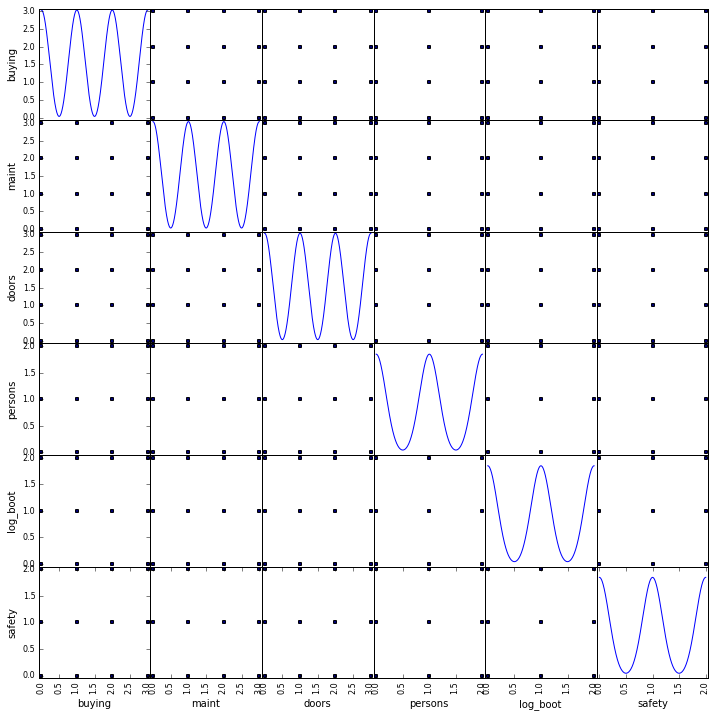

In [28]:
from pandas.tools.plotting import scatter_matrix

_ = scatter_matrix(df2, figsize=(12, 12), diagonal='kde')

### [Mission 4] 전체 데이터 집합에 대한 Entropy 산출

In [29]:
import urllib2
from scipy import stats
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
raw_csv = urllib2.urlopen(path)
feature_names = ('buying', 'maint', 'doors', 'persons', "log_boot", "safety")
target_name = 'eval'
all_names = feature_names + (target_name,)
df = pd.read_csv(raw_csv, names=all_names)

In [30]:
df_per_attr = {}   # 각 칼럼을 eval과 나누어 subgroup을 만들어 사전형으로 저장
for i in range(0, 6):
    df_per_attr[i] = {}
    groupby_df = df[[6, i]].groupby(feature_names[i])
    df_per_attr[i]['ngorups'] = groupby_df.ngroups
    df_per_attr[i]['group_keys'] = groupby_df.groups.keys()
    df_per_attr[i]['subgroups'] = {}
    for j in range(groupby_df.ngroups):
        df_per_attr[i]['subgroups'][j] = groupby_df.get_group(df_per_attr[i]['group_keys'][j])

In [31]:
df_per_attr[3]

{'group_keys': ['2', '4', 'more'],
 'ngorups': 3,
 'subgroups': {0:        eval persons
  0     unacc       2
  1     unacc       2
  2     unacc       2
  3     unacc       2
  4     unacc       2
  5     unacc       2
  6     unacc       2
  7     unacc       2
  8     unacc       2
  27    unacc       2
  28    unacc       2
  29    unacc       2
  30    unacc       2
  31    unacc       2
  32    unacc       2
  33    unacc       2
  34    unacc       2
  35    unacc       2
  54    unacc       2
  55    unacc       2
  56    unacc       2
  57    unacc       2
  58    unacc       2
  59    unacc       2
  60    unacc       2
  61    unacc       2
  62    unacc       2
  81    unacc       2
  82    unacc       2
  83    unacc       2
  ...     ...     ...
  1626  unacc       2
  1627  unacc       2
  1628  unacc       2
  1647  unacc       2
  1648  unacc       2
  1649  unacc       2
  1650  unacc       2
  1651  unacc       2
  1652  unacc       2
  1653  unacc       2
  1654  un

In [32]:
from collections import Counter
from math import log

labels = df['eval'].values   #eval 칼럼의 값이 labels에 저장
n_labels = len(labels)       #n_labels에 labels의 길이를 입력
n_labels

1728

In [33]:
labels

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'good', 'vgood'], dtype=object)

In [34]:
Counter(labels).values()   # 각 eval의 값이 몇번 평가가 되었는지 출력

[384, 1210, 69, 65]

In [35]:
counts = np.array(Counter(labels).values())
print counts

[ 384 1210   69   65]


In [36]:
probs = counts / float(n_labels)   #정규화 시키는 작업
print probs

[ 0.22222222  0.70023148  0.03993056  0.03761574]


In [37]:
n_classes = np.count_nonzero(probs)   #원소에 ZERO가 아닌것의 갯수를 셈
print n_classes

4


In [38]:
ent = 0.

for i in probs:
    ent -= i * log(i, n_classes)

print ent

0.602870485006


- 위의 과정을 간단한 함수로 정리하면 다음과 같다.

In [39]:
def entropy(labels):
    """ Computes entropy of label distribution. """
    from collections import Counter
    from math import log
    n_labels = len(labels)

    if n_labels <= 1:
        return 0

    counts = np.array(Counter(labels).values())
    probs = counts / float(n_labels)
    n_classes = np.count_nonzero(probs)

    if n_classes <= 1:
        return 0

    ent = 0.

    # Compute standard entropy.
    for i in probs:
        ent -= i * log(i, n_classes)

    return ent

In [40]:
entropy(df['eval'].values)

0.60287048500608764

### [Mission 5] Decision Tree 모델 구축을 고려하여 루트노드에서 첫번째 Branch를 위한 IG가 가장 높은 속성 산출

In [41]:
parent_size = float(len(df))  # 전체 DataFrame의 길이를 float화
parent_size

1728.0

In [42]:
for i in range(0, 6):
        sub_sum_entropy = 0.0
        print i
        for j in range(df_per_attr[i]['ngorups']):
            sub_size = len(df_per_attr[i]['subgroups'][j])
            sub_entropy = entropy([item[0] for item in df_per_attr[i]['subgroups'][j].values])   #각 평가 기준을 다시 나누어 sub _entropy를 계산
            print "%3.2f * %5.4f = %5.4f" % (sub_size / parent_size, sub_entropy, (sub_size / parent_size) * sub_entropy)
            sub_sum_entropy = sub_sum_entropy + (sub_size / parent_size) * sub_entropy   #sub_entropy의 값의 평균을 전체 entropy에서 빼 iG를 구함
        ig = entropy(df['eval'].values) - sub_sum_entropy
        df_per_attr[i]['information_gain'] = ig    #df_per_attr에 ig에 관련된 항목을 만들고 ig 값들을 저장
        print "Information Gain: %5.4f - %5.4f = %5.4f" % (entropy(df['eval'].values), sub_sum_entropy, ig)
        print

0
0.25 * 0.8113 = 0.2028
0.25 * 0.7024 = 0.1756
0.25 * 0.6500 = 0.1625
0.25 * 0.7855 = 0.1964
Information Gain: 0.6029 - 0.7373 = -0.1344

1
0.25 * 0.6200 = 0.1550
0.25 * 0.7024 = 0.1756
0.25 * 0.6500 = 0.1625
0.25 * 0.7453 = 0.1863
Information Gain: 0.6029 - 0.6794 = -0.0766

2
0.25 * 0.6350 = 0.1587
0.25 * 0.6059 = 0.1515
0.25 * 0.5267 = 0.1317
0.25 * 0.6350 = 0.1587
Information Gain: 0.6029 - 0.6006 = 0.0022

3
0.33 * 0.0000 = 0.0000
0.33 * 0.7404 = 0.2468
0.33 * 0.7388 = 0.2463
Information Gain: 0.6029 - 0.4930 = 0.1098

4
0.33 * 0.5679 = 0.1893
0.33 * 0.6280 = 0.2093
0.33 * 0.6856 = 0.2285
Information Gain: 0.6029 - 0.6271 = -0.0243

5
0.33 * 0.8078 = 0.2693
0.33 * 0.7667 = 0.2556
0.33 * 0.0000 = 0.0000
Information Gain: 0.6029 - 0.5248 = 0.0781



In [43]:
import operator
information_gain_dict = {}
for i in range(0, 6):
    information_gain_dict[i] = df_per_attr[i]['information_gain']    #df_per_attr의 ig 값들을 새로운 information_gain_dict에 저장

information_gain_dict

{0: -0.13443808367862897,
 1: -0.076564919618021809,
 2: 0.002242858313316054,
 3: 0.1098314816699541,
 4: -0.024277948325873711,
 5: 0.078058732848778067}

In [44]:
max(information_gain_dict.iteritems(), key=operator.itemgetter(1))   #가장 max한 값을 출력 해당 값이 

(3, 0.1098314816699541)

### [Mission 6] sklearn 모듈을 활용하여 Decision Tree 모델을 구축하고 예측 시도

In [45]:
from sklearn import tree
from sklearn.externals.six import StringIO

In [46]:
path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
raw_csv = urllib2.urlopen(path)
feature_names = ('buying', 'maint', 'doors', 'persons', "log_boot", "safety")
target_name = 'eval'
all_names = feature_names + (target_name,)
df = pd.read_csv(raw_csv, names=all_names)

- 기존의 데이터를 다시 Numerical로 변환

In [47]:
Numerical(df)

- data와 target을 나누기

In [48]:
car_data = df.ix[:,0:6]    # 평가 기준 데이터
car_eval = df[[6]]         # 기존 평가 데이터

In [49]:
car_data

,buying,maint,doors,persons,log_boot,safety
0,0,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,2
3,0,0,0,0,1,0
4,0,0,0,0,1,1
5,0,0,0,0,1,2
6,0,0,0,0,2,0
7,0,0,0,0,2,1
8,0,0,0,0,2,2
9,0,0,0,1,0,0


In [50]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(car_data, car_eval)

In [51]:
with open("car.dot", 'w') as f:
    tree.export_graphviz(clf, out_file=f)

### Decision Tree 모델을 구축
<img src="https://raw.githubusercontent.com/glenn89/Data_science/master/car.png" alt="car_Decision_Tree" align="center" />

In [52]:
clf.predict(car_data.ix[1723:1728])   #맨끝 5개의 자료로 예측

array([3, 2, 0, 3, 2])

In [53]:
car_eval.tail()    # sklearn 시킨 결과와 기존의 평가 값이 같은 것을 볼 수 있다.

,eval
1723,3
1724,2
1725,0
1726,3
1727,2


In [54]:
(clf.predict(car_data) == car_eval['eval']).any()

True